<a href="https://colab.research.google.com/github/Ammarmalik98/British-Airways-Data-Science-Internship/blob/main/BA_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


we shall now check to see which `sales_channel` is most used for booking flights.
Below we can see that:
- `Internet` is by far the most used `sales_channel``for booking flights.
- About

In [ ]:
internet_count = len(df[df["sales_channel"] == "Internet"])
mobile_count = len(df[df["sales_channel"] == "Mobile"])
int_percent = (internet_count/(internet_count + mobile_count)) * 100
mob_percent = (mobile_count/(internet_count + mobile_count)) * 100
print("Internet bookings: " f"{int_percent}," " " "Mobile bookings: " f"{mob_percent}")


Internet bookings: 88.764, Mobile bookings: 11.236


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# check what days have the most booking
df.flight_day.value_counts()

flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64

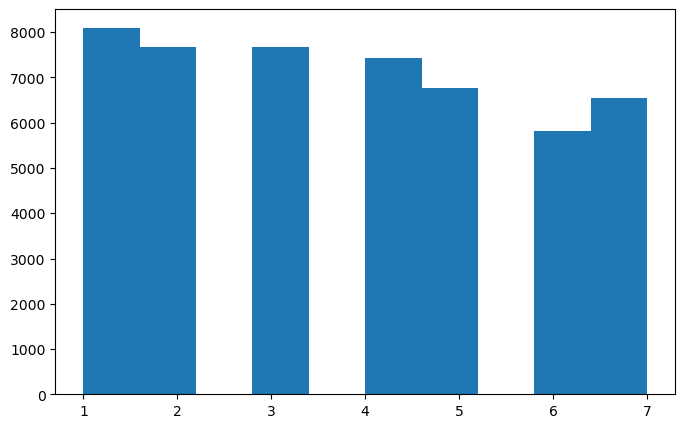

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df["flight_day"])
plt.show()

<Axes: xlabel='trip_type', ylabel='purchase_lead'>

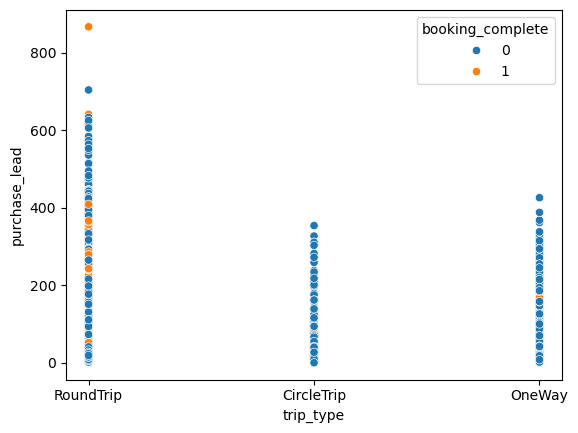

In [ ]:
sns.scatterplot(x="trip_type", y="purchase_lead", data= df, hue= "booking_complete")

In [ ]:
df_bookings = df[df["booking_complete"] == 1]
df_bookings

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,1,AKLKUL,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,1,AKLKUL,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,2,AKLKUL,Singapore,1,0,1,8.83,1
109,1,Mobile,RoundTrip,127,17,16,2,AKLKUL,Malaysia,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,2,AKLKUL,Malaysia,0,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,1,Internet,RoundTrip,33,6,6,3,PENTPE,Taiwan,1,1,0,4.67,1
49977,2,Internet,RoundTrip,15,6,16,2,PENTPE,Malaysia,1,1,1,4.67,1
49980,4,Internet,RoundTrip,242,6,9,2,PENXIY,Malaysia,1,0,1,5.00,1
49984,2,Internet,RoundTrip,7,6,4,3,PERPNH,Australia,0,0,0,5.62,1


In [ ]:
top_countries_df = df.booking_origin.value_counts().head(10)

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_154288\4193360511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries_df, x='booking_origin', y='Order Count', palette='viridis')


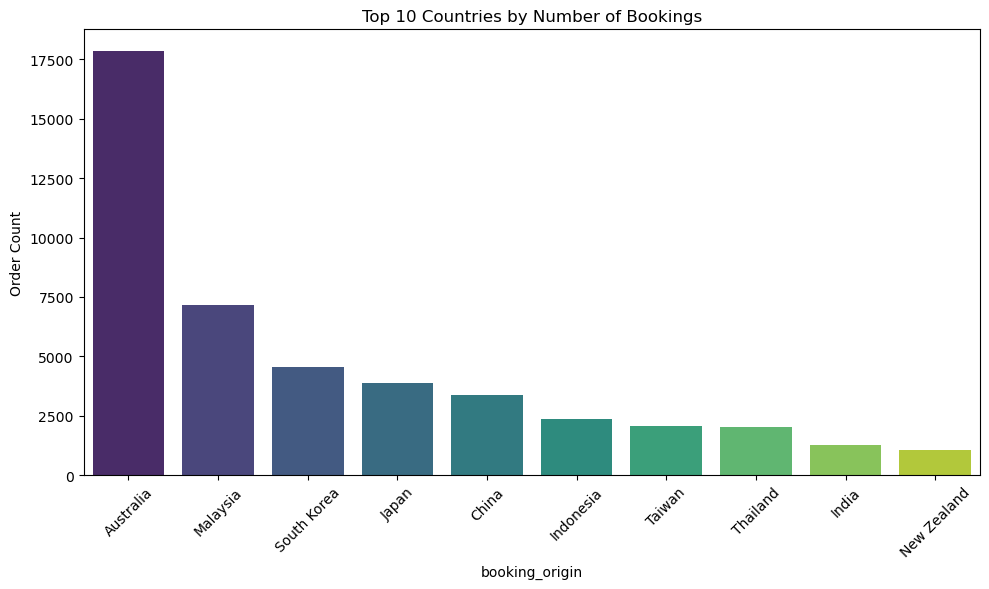

In [ ]:
top_countries_df = top_countries_df.reset_index()
top_countries_df.columns = ['booking_origin', 'Order Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries_df, x='booking_origin', y='Order Count', palette='viridis')
plt.title('Top 10 Countries by Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.trip_type.value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

`trip_type` is encoded thus:
- `CircleTrip` --> 0
- `OneWay` --> 1
- `RoundTrip` --> 2

In [ ]:
df["trip_type"].replace({"CircleTrip": 0, "OneWay": 1, "RoundTrip": 2}, inplace = True)
df

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_154288\4074692678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["trip_type"].replace({"CircleTrip": 0, "OneWay": 1, "RoundTrip": 2}, inplace = True)
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_154288\4074692678.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,2,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,2,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,2,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,2,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,2,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df.sales_channel.value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

Encode `sales_channel` :
- `Internet` --> 0
- `Mobile` --> 1


In [ ]:
df.sales_channel.replace({"Internet":0, "Mobile":1}, inplace=True)
df.head()

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_154288\376748725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sales_channel.replace({"Internet":0, "Mobile":1}, inplace=True)
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_154288\376748725.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,2,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,2,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df_corr = df.drop(["route", "booking_origin"], axis=1)
df_corr.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,0,0,5.52,0
2,2,0,2,243,22,17,3,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,0,1,5.52,0
4,2,0,2,68,22,15,3,1,0,1,5.52,0


In [ ]:
df_corr.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.002457,0.002261,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,-0.002457,1.000000,0.021237,-0.013399,-0.060352,0.022375,0.042095,-0.054254,0.032943,-0.022235,-0.038629,-0.041060
trip_type,0.002261,0.021237,1.000000,-0.008443,0.006510,-0.002758,-0.001381,-0.014078,0.005668,0.011955,-0.039071,0.027021
purchase_lead,0.212606,-0.013399,-0.008443,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.060352,0.006510,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.022375,-0.002758,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.042095,-0.001381,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.054254,-0.014078,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,0.032943,0.005668,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022235,0.011955,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511


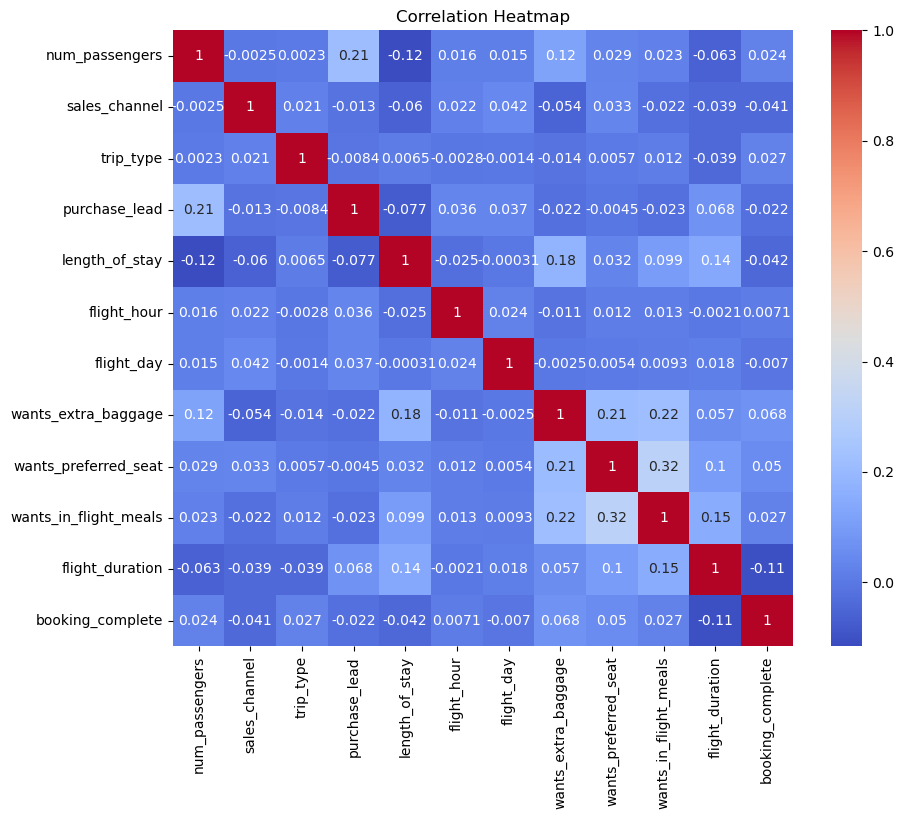

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Building the Model

The Model to be used is `Random Forrest Classifier` based on prescription. we shall now proceed to preparing the dataset for the model

In [ ]:
df=df_corr

In [ ]:
# Seperate features and Target Columns
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

In [ ]:
X.shape

(50000, 11)

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the Dataset into the `Train` dataset and `Test` dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Next, Import and Innitiate the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the model
model.fit(X=X_train, y=y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X=X_test)

In [ ]:
# Train set accuracy
train_acc = model.score(X_train, y_train)
train_acc

0.999575

In [ ]:
# Test set accuracy
test_acc = model.score(X_test, y_test)
test_acc

0.8465

Improving Model accuracy via Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold CV

# Check the results
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.85   0.8294 0.7727 0.384  0.4071]
Average Accuracy: 0.64864


Now to check the accuracy of the model using the following Metrics:
- Confusion Matrix
- Classification Report
- Precision Score
- Recall Score
- F1-Score

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-score
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[8366   96]
 [1439   99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      8462
           1       0.51      0.06      0.11      1538

    accuracy                           0.85     10000
   macro avg       0.68      0.53      0.52     10000
weighted avg       0.80      0.85      0.79     10000



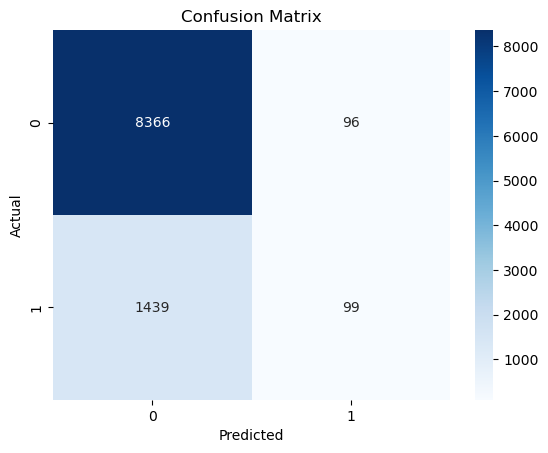

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
pip install yellowbrick


   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 393.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 409.6 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 525.1 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 525.1 kB/s eta 0:00:01
   ---------------------- --------------- 163.8/282.6 kB 579.6 kB/s eta 0:00:01
   ------------------------------ ------- 225.3/282.6 kB 724.0 kB/s eta 0:00:01
   ---------------------------------- --- 256.0/282.6 kB 684.6 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 670.8 kB/s eta 0:00:00


C:\Users\HP EliteBook\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


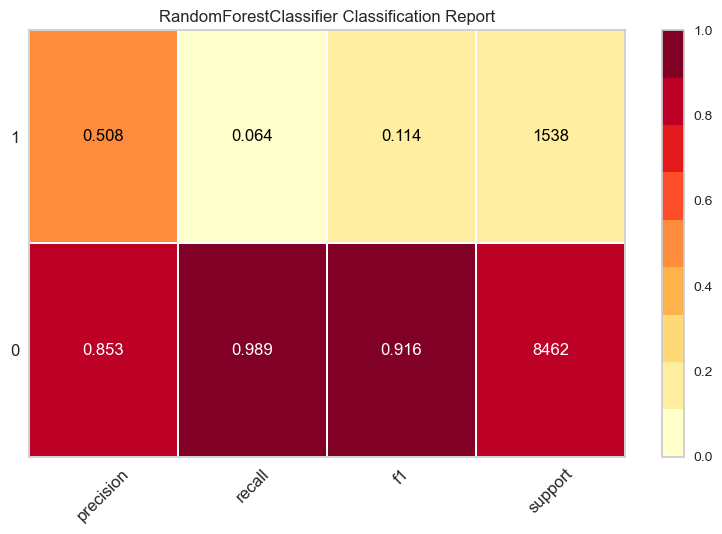

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
